In [73]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation
import datetime

In [74]:
conn = pymysql.connect(host = '15.164.232.202', user = 'root',
                      password = '0128gksqls', db = 'shem',charset = 'utf8')

curs = conn.cursor()

sql = "select dt,elec from cont_data"

curs.execute(sql)
rows = curs.fetchall()

col_date = [i[0] for i in rows]
col_elec = [i[1] for i in rows]
data = pd.DataFrame(data = {'data':col_date,'elec':col_elec})
conn.close()
print(col_elec)

[59.0, 38.0, 35.0, 61.0, 152.0, 141.0, 77.0, 90.0, 14.0, 110.0, 2.0, 41.0, 99.0, 47.0, 135.0, 73.0, 86.0, 4.0, 129.0, 135.0, 200.0, 118.0, 153.0, 169.0, 159.0, 107.0, 169.0, 16.0, 3.0, 76.0, 102.0, 90.0, 158.0, 157.0, 38.0, 3.0, 19.0, 159.0, 143.0, 7.0, 83.0, 19.0, 4.0, 31.0, 177.0, 28.0, 109.0, 40.0, 106.0, 69.0, 130.0, 128.0, 70.0, 170.0, 71.0, 31.0, 42.0, 106.0, 31.0, 179.0, 60.0, 18.0, 189.0, 77.0, 29.0, 50.0, 51.0, 77.0, 57.0, 36.0, 102.0, 55.0, 194.0, 46.0, 108.0, 103.0, 113.0, 64.0, 38.0, 159.0, 142.0, 111.0, 8.0, 86.0, 115.0, 189.0, 34.0, 190.0, 127.0, 137.0, 123.0, 84.0, 1.0, 176.0, 129.0, 176.0, 126.0, 12.0, 193.0, 165.0, 82.0, 61.0, 199.0, 32.0, 3.0, 195.0, 166.0, 80.0, 129.0, 118.0, 20.0, 157.0, 117.0, 148.0, 102.0, 1.0, 81.0, 94.0, 64.0, 41.0, 42.0, 6.0, 140.0, 91.0, 19.0, 127.0, 84.0, 173.0, 182.0, 45.0, 33.0, 35.0, 127.0, 169.0, 21.0, 108.0, 104.0, 138.0, 147.0, 107.0, 57.0, 99.0, 174.0, 84.0, 30.0, 115.0, 144.0, 186.0, 94.0, 122.0, 37.0, 80.0, 42.0, 47.0, 129.0, 180.0, 

In [75]:

seq_len = 72
sequence_length = seq_len+1
result = []
for index in range(len(col_elec) - sequence_length):
    result.append(col_elec[index:index + sequence_length])
print(result)

[[59.0, 38.0, 35.0, 61.0, 152.0, 141.0, 77.0, 90.0, 14.0, 110.0, 2.0, 41.0, 99.0, 47.0, 135.0, 73.0, 86.0, 4.0, 129.0, 135.0, 200.0, 118.0, 153.0, 169.0, 159.0, 107.0, 169.0, 16.0, 3.0, 76.0, 102.0, 90.0, 158.0, 157.0, 38.0, 3.0, 19.0, 159.0, 143.0, 7.0, 83.0, 19.0, 4.0, 31.0, 177.0, 28.0, 109.0, 40.0, 106.0, 69.0, 130.0, 128.0, 70.0, 170.0, 71.0, 31.0, 42.0, 106.0, 31.0, 179.0, 60.0, 18.0, 189.0, 77.0, 29.0, 50.0, 51.0, 77.0, 57.0, 36.0, 102.0, 55.0, 194.0], [38.0, 35.0, 61.0, 152.0, 141.0, 77.0, 90.0, 14.0, 110.0, 2.0, 41.0, 99.0, 47.0, 135.0, 73.0, 86.0, 4.0, 129.0, 135.0, 200.0, 118.0, 153.0, 169.0, 159.0, 107.0, 169.0, 16.0, 3.0, 76.0, 102.0, 90.0, 158.0, 157.0, 38.0, 3.0, 19.0, 159.0, 143.0, 7.0, 83.0, 19.0, 4.0, 31.0, 177.0, 28.0, 109.0, 40.0, 106.0, 69.0, 130.0, 128.0, 70.0, 170.0, 71.0, 31.0, 42.0, 106.0, 31.0, 179.0, 60.0, 18.0, 189.0, 77.0, 29.0, 50.0, 51.0, 77.0, 57.0, 36.0, 102.0, 55.0, 194.0, 46.0], [35.0, 61.0, 152.0, 141.0, 77.0, 90.0, 14.0, 110.0, 2.0, 41.0, 99.0, 47.0

In [76]:
normalized_data = []
for window in result:
    if window[0] == 0:
        window[0] = 100
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
y_test = result[row:,-1]

x_train.shape, x_test.shape,y_train.shape,y_test.shape

((1230, 72, 1), (137, 72, 1), (1230,), (137,))

In [77]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(72,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 72, 50)            10400     
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(x_train,y_train,
         validation_data=(x_test, y_test),
         batch_size=10,
         epochs=20)

Train on 1230 samples, validate on 137 samples
Epoch 1/20
1230/1230 [==============================] - 9s 8ms/step - loss: 131.6936 - val_loss: 35.5669
Epoch 2/20
1230/1230 [==============================] - 8s 7ms/step - loss: 119.0518 - val_loss: 29.6866
Epoch 3/20
1230/1230 [==============================] - 8s 7ms/step - loss: 115.1429 - val_loss: 29.6530
Epoch 4/20
1230/1230 [==============================] - 8s 7ms/step - loss: 112.8246 - val_loss: 26.5625
Epoch 5/20
1230/1230 [==============================] - 8s 7ms/step - loss: 110.5520 - val_loss: 24.8769
Epoch 6/20
1230/1230 [==============================] - 8s 7ms/step - loss: 106.0879 - val_loss: 24.2137
Epoch 7/20
1230/1230 [==============================] - 8s 7ms/step - loss: 102.2661 - val_loss: 24.5601
Epoch 8/20
1230/1230 [==============================] - 8s 7ms/step - loss: 101.1942 - val_loss: 19.8107
Epoch 9/20
1230/1230 [==============================] - 8s 7ms/step - loss: 97.6535 - val_loss: 30.6513
Epoch 10/

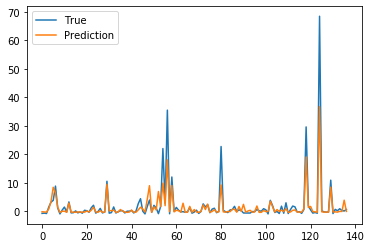

In [79]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()